In [130]:
import pandas as pd
import numpy as np
import glob

class DataScienceProject():
    def __init__(self, dataFolderPath: str, datasetFormat: str):
        self.dataframes = []
        self.cleanup_nums = dict()
        for filename in glob.glob(dataFolderPath + "/*" + datasetFormat):
            dataframe = pd.read_csv(filename)
            self.dataframes.append(self.__cleanData(dataframe))

    #delete, rename useless column of the dataset passed in parameter and change some values
    def __cleanData(self, dataframe):
        #column name['platform', 'genre', 'global_sales', 'release_year']
        if "Platform" in dataframe:
            dataframe.rename(columns={'Platform': 'platform'}, inplace=True)
        if "console" in dataframe:
            dataframe.rename(columns={'console': 'platform'}, inplace=True)
        if "Genre" in dataframe:
            dataframe.rename(columns={'Genre': 'genre'}, inplace=True)
        if "Global_Sales" in dataframe:
            dataframe.rename(columns={'Global_Sales': 'global_sales'}, inplace=True)
        if "total_sales" in dataframe:
            dataframe.rename(columns={'total_sales': 'global_sales'}, inplace=True)
        if "release_date" in dataframe:
            #change date to year only
            dataframe['release_year'] = pd.to_datetime(dataframe['release_date']).dt.strftime('%Y')
            # dataframe.rename(columns={'release_date': 'release_year'}, inplace=True)
        if "Year" in dataframe:
            dataframe.rename(columns={'Year': 'release_year'}, inplace=True)
        #delete all NAN data (unseted data)
        dataframe.dropna(subset=['platform', 'genre', 'global_sales', 'release_year'], inplace=True)
        #convert data type string to int
        dataframe['release_year'] = dataframe['release_year'].astype(int)

        ##remove all games released before 2010
        # Get names of indexes for which column Age has value 30
        indexNames = dataframe[ dataframe['release_year'] < 2013].index
        # Delete these row indexes from dataframe_copy
        dataframe.drop(indexNames , inplace=True)
        #drop all columns EXCEPT the one passed trought parameters
        dataframe = dataframe.loc[:, dataframe.columns.isin(['platform', 'genre', 'global_sales', 'release_year'])]

        return dataframe


    def getDataFrames(self):
        return self.dataframes

    ##Merge all dataframe contained inside dataframes into one dataframe
    def generateVideoGamesDataframe(self, dataframes):
        current = dataframes[0]
        for i, frame in enumerate(dataframes[1:], len(dataframes)):
            current = current.merge(frame)

        return current

    #display most genre games sold After the year passed as parameter
    def getMostGenreGamesSold(self, dataframe, year: int):
        import seaborn as sns
        import matplotlib.pyplot as plt

        dataframe_copy = dataframe.copy() 
        # Get names of indexes for which column Age has value 30
        indexNames = dataframe_copy[ dataframe_copy['release_year'] != year].index
        # Delete these row indexes from dataframe_copy
        dataframe_copy.drop(indexNames , inplace=True)
        #todo sort to acending order
        return dataframe_copy
    
    #display most genre games sold After year passed as parameter
    def getMostgamePlatformSold(self, dataframe, year: int):
        import seaborn as sns
        import matplotlib.pyplot as plt

        dataframe_copy = dataframe.copy() 
        # Get names of indexes for which column Age has value 30
        indexNames = dataframe_copy[ dataframe_copy['release_year'] != year].index
        # Delete these row indexes from dataframe_copy
        dataframe_copy.drop(indexNames , inplace=True)
        #todo sort to acending order
        return dataframe_copy
    
    #check most sold genre games on the most sold platform (PS4, XboxOne, Switch, PC)
    def getMostSoldGenreGamesByPlatform(self, dataframe, year: int, platform: str):
        import seaborn as sns
        import matplotlib.pyplot as plt
        #copy dataset
        dataframe_copy = dataframe.copy()

        # Get selected platform games released AFTER `year` parameter
        indexNames = dataframe_copy[ (dataframe_copy['release_year'].astype(int) < year) | (dataframe_copy['platform'] != platform) ].index
        # Delete these row indexes from dataFrame
        dataframe_copy.drop(indexNames , inplace=True)

        indexNames = dataframe_copy[ dataframe_copy['global_sales'].astype(float) == 0].index
        #Delete these row indexes from dataFrame
        dataframe_copy.drop(indexNames , inplace=True)

        #return filtered dataset
        return dataframe_copy

    def getGamesSelling(self, dataframe):
        #copy dataset
        #TODO(Camille) create a dataset with 10 rows of each year and return it
        dataframe_copy = dataframe.copy()

        # Get selected platform games released AFTER `year` parameter
        #ten_best_sales_per_year = dataframe_copy.groupby("release_year")["global_sales"].nlargest(10).sum(level=0)
        sort = dataframe_copy.groupby("release_year")
        dataframe_copy = sort.head(10)

        #todo sort to acending order
        return dataframe_copy

    def convertCategoricalToNumerical(self, dataframe, platforms: list, genres: list):
        # #copy dataset
        dataframe_copy = dataframe.copy()
        indexNames = dataframe_copy[~dataframe_copy['platform'].isin(platforms) | ~dataframe_copy['genre'].isin(genres)].index
        # Delete these row indexes from dataFrame
        dataframe_copy.drop(indexNames , inplace=True)
        #convert genre/platform (categorical values) to numerical one
        self.cleanup_nums = {
                "genre":{"Action": 0, "Adventure": 1, "Action-Adventure": 2, "Board Game": 3, "Fighting": 4, "Misc": 5, "MMO": 6, "Music": 7, "Party": 8,
                "Platform": 9, "Puzzle": 10, "Racing": 11, "Role-Playing": 12, "Sandbox": 13, "Shooter": 14, "Simulation": 15, "Sports": 16, 
                "Strategy": 17,  "Visual Novel": 18},
                "platform": {"PS4": 0, "XOne": 1, "NS": 2, "PC": 3, "3DS": 4}
        }
        dataframe_copy = dataframe_copy.replace(self.cleanup_nums)
        return dataframe_copy

    ##predict Y with X features,
    ##predictor parameter is the features in order to use our model
    def predict(self, cleanDataframe, y, X, predicter):
        from sklearn.model_selection import train_test_split
        from sklearn.ensemble import RandomForestClassifier
        import numpy as np
        from sklearn import metrics

        # Split dataset into training set and test set
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
        clf=RandomForestClassifier(n_estimators=100)
        clf.fit(X_train,y_train)
        y_pred=clf.predict(X_test)
        # Model Accuracy, how often is the classifier correct?
        print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
        #return prediction
        return clf.predict([predicter])

dataScienceProject = DataScienceProject('./samples/', '.csv')
dataframes = dataScienceProject.getDataFrames()
cleanDataSet = dataScienceProject.generateVideoGamesDataframe(dataframes)
gamesSelling = dataScienceProject.getGamesSelling(cleanDataSet)

[Text(0.5, 0, 'global_sales (2019)'), Text(0, 0.5, 'genre (2019)')]

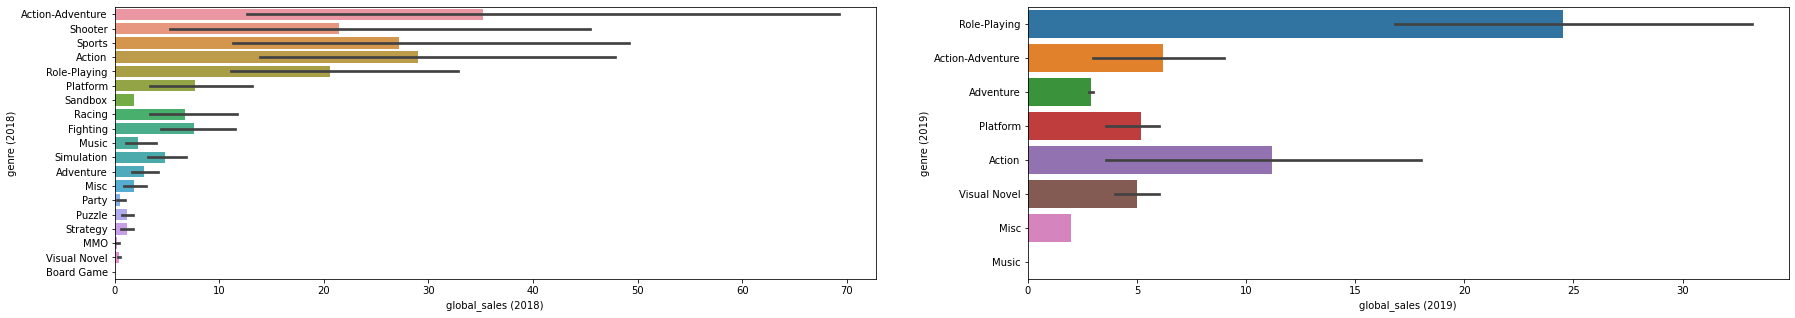

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

# #display most genre games sold After 2018

fig, axs = plt.subplots(ncols=2, figsize=(30,5))

ax = sns.barplot(x="global_sales", y="genre", data=dataScienceProject.getMostGenreGamesSold(cleanDataSet, 2018), estimator=sum, ax=axs[0])
ax.set(xlabel='global_sales (2018)', ylabel='genre (2018)')
bx = sns.barplot(x="global_sales", y="genre", data=dataScienceProject.getMostGenreGamesSold(cleanDataSet, 2019), estimator=sum, ax=axs[1])
bx.set(xlabel='global_sales (2019)', ylabel='genre (2019)')

[Text(0.5, 0, 'global_sales (2020)'), Text(0, 0.5, 'platform (2020)')]

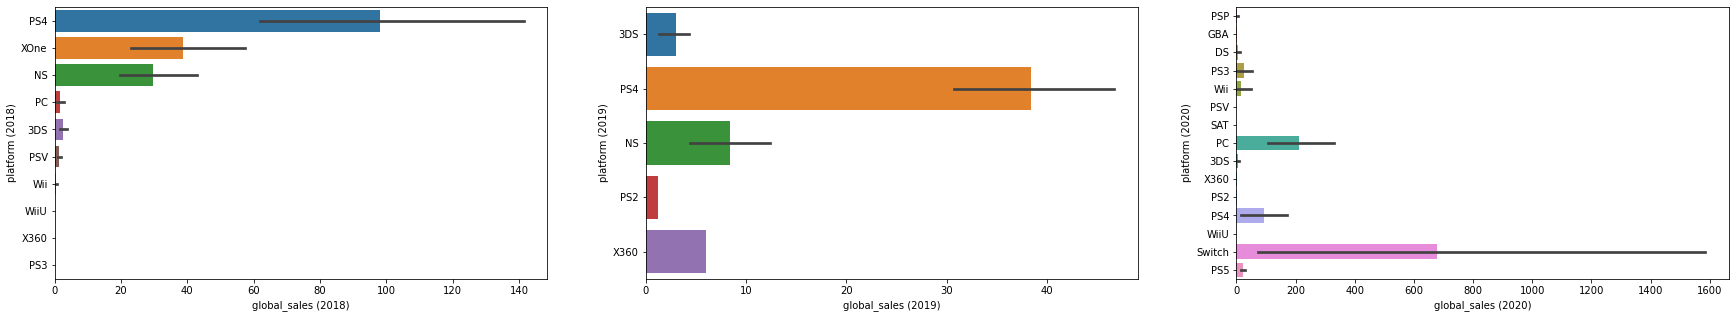

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

# #Check most game's platform sold after 2018

fig, axs = plt.subplots(ncols=3, figsize=(30,5))

ax = sns.barplot(x="global_sales", y="platform", data=dataScienceProject.getMostgamePlatformSold(cleanDataSet, 2018), estimator=sum, ax=axs[0])
ax.set(xlabel='global_sales (2018)', ylabel='platform (2018)')
bx = sns.barplot(x="global_sales", y="platform", data=dataScienceProject.getMostgamePlatformSold(cleanDataSet, 2019), estimator=sum, ax=axs[1])
bx.set(xlabel='global_sales (2019)', ylabel='platform (2019)')
cx = sns.barplot(x="global_sales", y="platform", data=dataScienceProject.getMostgamePlatformSold(cleanDataSet, 2020), estimator=sum, ax=axs[2])
cx.set(xlabel='global_sales (2020)', ylabel='platform (2020)')

[Text(0.5, 0, 'global_sales (PC)'), Text(0, 0.5, 'genre (PC)')]

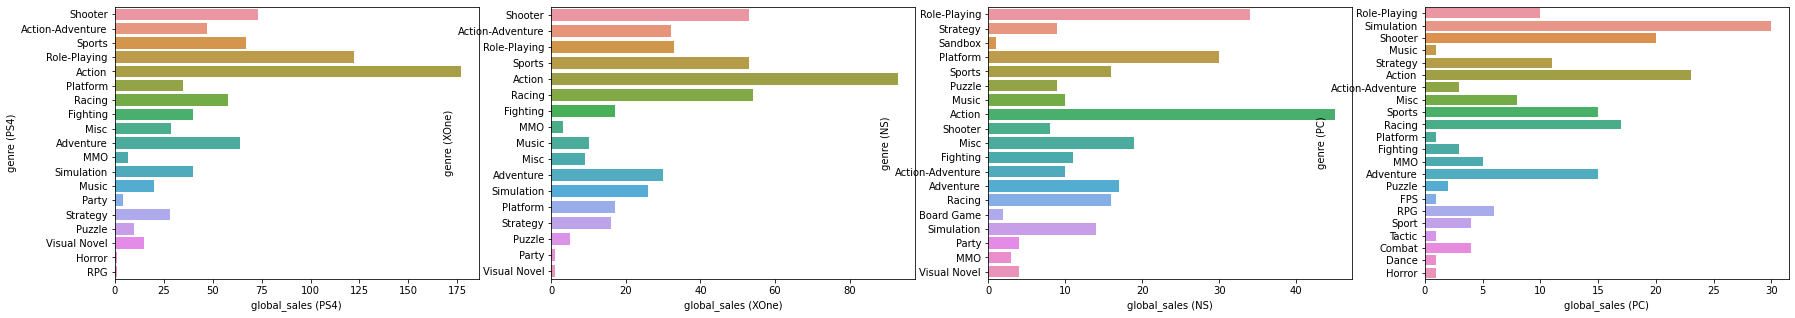

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import count_nonzero
#check most sold genre games on the most sold platform (PS4, XboxOne, Switch, PC)
#you can change the date and see how the genre on a specific console are variating 

fig, axs = plt.subplots(ncols=4, figsize=(30,5))

ax = sns.barplot(x="global_sales", y="genre", data=dataScienceProject.getMostSoldGenreGamesByPlatform(cleanDataSet, 2015, "PS4"), estimator=count_nonzero, ax=axs[0])
ax.set(xlabel='global_sales (PS4)', ylabel='genre (PS4)')
bx = sns.barplot(x="global_sales", y="genre", data=dataScienceProject.getMostSoldGenreGamesByPlatform(cleanDataSet, 2015, "XOne"), estimator=count_nonzero, ax=axs[1])
bx.set(xlabel='global_sales (XOne)', ylabel='genre (XOne)')
cx = sns.barplot(x="global_sales", y="genre", data=dataScienceProject.getMostSoldGenreGamesByPlatform(cleanDataSet, 2015, "NS"), estimator=count_nonzero, ax=axs[2])
cx.set(xlabel='global_sales (NS)', ylabel='genre (NS)')
dx = sns.barplot(x="global_sales", y="genre", data=dataScienceProject.getMostSoldGenreGamesByPlatform(cleanDataSet, 2015, "PC"), estimator=count_nonzero, ax=axs[3])
dx.set(xlabel='global_sales (PC)', ylabel='genre (PC)')



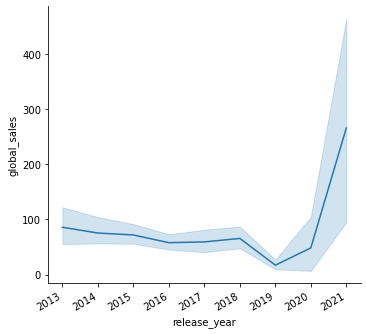

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.relplot(x="release_year", y="global_sales", estimator=sum, kind="line", data=dataScienceProject.getGamesSelling(cleanDataSet))
g.fig.autofmt_xdate()


In [135]:
##predict the most famous game genre in 2021

genres = ["Action", "Adventure", "Action-Adventure", "Board Game", "Fighting", "Misc", "MMO", "Music", "Party",
            "Platform", "Puzzle", "Racing", "Role-Playing", "Sandbox", "Shooter", "Simulation", "Sports", 
            "Strategy", "Visual Novel"]
platforms = ["PS4", "XOne", "NS", "PC", "3DS"]

#we clean the "cleanDataSet" by removing all the rows that do not contain genres and platforms listed above
df = dataScienceProject.convertCategoricalToNumerical(cleanDataSet, platforms, genres)

#list of features
X=df[['platform', 'global_sales', 'release_year']]  # Features
#what we want to predict
y=df['genre']  # Labels

#last parameters are the parameters set to our models
predictedGenre = dataScienceProject.predict(df, y, X, [0, 0.5, 2021])

#reconvert numerical value to categorical
categoricalPredictedGenre= [genre for genre in dataScienceProject.cleanup_nums['genre'].keys() if dataScienceProject.cleanup_nums['genre'][genre] == predictedGenre]
print("Predicted Genre= ", categoricalPredictedGenre)

Accuracy: 0.14325068870523416
Predicted Genre=  ['Action']


In [136]:
##predict the most famous game platform in 2021

genres = ["Action", "Adventure", "Action-Adventure", "Board Game", "Fighting", "Misc", "MMO", "Music", "Party",
            "Platform", "Puzzle", "Racing", "Role-Playing", "Sandbox", "Shooter", "Simulation", "Sports", 
            "Strategy", "Visual Novel"]
platforms = ["PS4", "XOne", "NS", "PC", "3DS"]

#we clean the "cleanDataSet" by removing all the rows that do not contain genres and platforms listed above
df = dataScienceProject.convertCategoricalToNumerical(cleanDataSet, platforms, genres)

#list of features
X=df[['genre', 'global_sales', 'release_year']]  # Features
#what we want to predict
y=df['platform']  # Labels

#last parameters are the parameters set to our models
predictionplatform = dataScienceProject.predict(df, y, X, [0, 0.5, 2021])

#reconvert numerical value to categorical
categoricalPredictedPlatform = [platform for platform in dataScienceProject.cleanup_nums['platform'].keys() if dataScienceProject.cleanup_nums['platform'][platform] == predictionplatform]
print("Predicted Platform = ", categoricalPredictedPlatform)


Accuracy: 0.39118457300275483
Predicted Platform =  ['3DS']
